In [1]:
import numpy
import math
from astropy.io import fits
from astropy.table import Table
from matplotlib.colors import LogNorm
from astropy.modeling import models, fitting

#set up matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
HI_Pipe3D_WISE = fits.open("WISE_Pipe3D_HI_new.fits", memmap=True)
HI_Pipe3D_WISE_table = Table(HI_Pipe3D_WISE[1].data)


In [3]:
MHI_log_initial = numpy.array(HI_Pipe3D_WISE_table['LOGMHI'])  # Stores all data of MHI log(Msun)
SM_log_initial = numpy.array(HI_Pipe3D_WISE_table['log_Mass'])    #SM = Stellar Mass    log(Msun)
W2_initial = numpy.array(HI_Pipe3D_WISE_table['W2'])  # Stores all data of W2
W3_initial = numpy.array(HI_Pipe3D_WISE_table['W3'])  # Stores all data of W3
Flagall = numpy.array(HI_Pipe3D_WISE_table['conflag'])   # All Flag data 
Plateifu_initial = numpy.array(HI_Pipe3D_WISE_table['plateifu_1'])
MHI_limit_initial = numpy.array(HI_Pipe3D_WISE_table['LOGHILIM200KMS'])     # upper limits for non-detections

detections = numpy.where((MHI_log_initial > 0) & (Flagall==0))
non_detections = numpy.where((MHI_limit_initial > 0) & (Flagall==0))

W2diffW3 = W2_initial - W3_initial


# Data for detections
MHI_log = MHI_log_initial[detections]                  # HI Mass log(Msun)
SM_log_detect = SM_log_initial[detections]                    # Steller Mass log(Msun)
W2diffW3_detect = W2diffW3[detections]
Plateifu_detect = Plateifu_initial[detections]

MF_log_detect = MHI_log - SM_log_detect                     # Mass Fraction     log(Msun) 

# print(len(W2diffW3_detect), len(MF_log_detect))           



# Data for non-detections
MHI_limit = MHI_limit_initial[non_detections]                  # HI Mass limit log(Msun)
SM_log_Ndetect = SM_log_initial[non_detections]                    # Steller Mass log(Msun)
W2diffW3_Ndetect = W2diffW3[non_detections]
Plateifu_Ndetect = Plateifu_initial[non_detections]

MF_log_Ndetect = MHI_limit - SM_log_Ndetect                     # Mass Fraction     log(Msun) 

print(len(MHI_limit[numpy.where((W2diffW3_Ndetect < 2.0) & (MF_log_Ndetect < -1.2))]))
print(len(MHI_log[numpy.where((W2diffW3_detect < 2) & (MF_log_detect > -1.2))]))


509
73


/packages/python3.6.8/lib/python3.6/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in less
/packages/python3.6.8/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in less


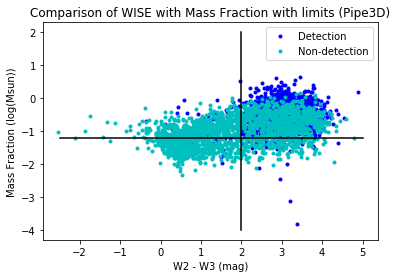

In [4]:
plt.xlabel("W2 - W3 (mag)")
plt.ylabel("Mass Fraction (log(Msun))")
plt.title("Comparison of WISE with Mass Fraction with limits (Pipe3D)")

plt.plot(W2diffW3_detect, MF_log_detect, "b.", label='Detection')
plt.plot(W2diffW3_Ndetect, MF_log_Ndetect, "c.", label='Non-detection')
plt.plot([2, 2], [-4, 2], "k-")
plt.plot([-2.5, 5], [-1.2, -1.2], "k-")

plt.legend()
plt.show()

In [5]:

sample = numpy.where((W2diffW3_detect < 2) & (MF_log_detect > -1.2))
notsample = numpy.where((W2diffW3_Ndetect < 2.0) & (MF_log_Ndetect < -1.2))

print(sample)
print(notsample)

(array([  15,   19,   28,   61,  117,  121,  211,  281,  326,  373,  399,
        406,  449,  503,  535,  548,  549,  554,  560,  608,  639,  653,
        661,  669,  676,  683,  708,  713,  719,  722,  737,  763,  771,
        775,  791,  797,  804,  813,  819,  820,  849,  857,  866,  869,
        872,  877,  878,  881,  894,  918,  946,  952,  958,  959,  974,
        993, 1006, 1033, 1043, 1052, 1056, 1060, 1081, 1085, 1091, 1107,
       1118, 1137, 1150, 1163, 1168, 1172, 1173]),)
(array([ 263,  324,  367,  440,  504,  591,  635,  643,  664,  666,  667,
        671,  715,  735,  738,  739,  740,  741,  743,  744,  745,  764,
        815,  846,  851,  870,  979,  981,  983,  996,  997,  998, 1003,
       1004, 1007, 1008, 1010, 1013, 1015, 1020, 1021, 1031, 1037, 1040,
       1045, 1046, 1047, 1048, 1051, 1055, 1056, 1057, 1059, 1061, 1065,
       1066, 1068, 1069, 1070, 1071, 1073, 1076, 1078, 1080, 1087, 1091,
       1101, 1103, 1104, 1108, 1109, 1110, 1112, 1113, 1114, 1119, 112

/packages/python3.6.8/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  
/packages/python3.6.8/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in less
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
MHI_sample = MHI_log[sample]
W2diffW3_sample = W2diffW3_detect[sample]
SM_sample = SM_log_detect[sample]
MF_sample = MF_log_detect[sample]
Plateifu_sample = [x.strip() for x in Plateifu_detect[sample]]  

MHI_notsample = MHI_limit[notsample]
W2diffW3_notsample = W2diffW3_Ndetect[notsample]
SM_notsample = SM_log_Ndetect[notsample]
MF_notsample = MF_log_Ndetect[notsample]
Plateifu_notsample = [x.strip() for x in Plateifu_Ndetect[notsample]]


required_index = []
temp_index = []
done_index = []

err = 1.0

while len(required_index) <= 73:

    for index1, diff1 in enumerate(W2diffW3_sample):
        temp_index = []
        for index2, diff2 in enumerate(W2diffW3_notsample):
            if (diff2 < diff1 + err) and (diff2 > diff1 - err) and (SM_notsample[index2] < SM_sample[index1] + err) and \
            (SM_notsample[index2] > SM_sample[index1] - err) and index2 not in required_index and index1 not in done_index :
                required_index.append(index2)
                done_index.append(index1)
    err += 1.0
    
print(required_index)
print(len(required_index))


In [31]:
# # 0.1 : 
# [233, 15, 54, 20, 85, 21, 3, 46, 14, 124, 16, 216, 135, 65, 63, 2, 222, 34, 99, 174, 522, 383, 28, 17, 196, 195, 288, 39, 314, 221, 364, 167, 396, 29, 192, 136, 274, 49, 228, 120, 264, 154, 368, 532, 284, 453, 246, 430, 243, 13, 141, 50, 412, 301, 428, 212, 1, 7, 294, 126, 305, 546, 484, 4, 66, 279, 319, 565, 607, 365, 277, 215, 254, 433, 219, 594, 313, 100, 422, 528, 371, 214, 355, 26, 217, 445, 379, 414, 346, 307, 8, 340, 259, 175, 387, 62, 67]

# # 0.01 :
# [929, 354, 879, 174, 829, 428, 513, 175, 418, 739, 223, 274, 920, 422, 738, 572, 206, 46, 832, 809, 224, 305, 457, 715, 1, 214, 770, 48, 893, 54, 44, 180, 173, 3, 538, 855, 99, 268, 192, 986, 330, 367, 179, 848, 356, 752, 388, 254, 546, 327, 565, 355, 125, 624, 387, 33, 249, 473, 140, 616, 522, 458, 469, 754, 136, 263, 360, 313, 988, 890, 219, 351, 637, 325, 336, 897, 243, 212, 377, 642, 414, 728, 52, 184, 396, 221, 532, 371, 567, 151, 7, 632, 528, 294, 983, 304, 67]

# # 0.001 :
# [929, 879, 428, 175, 829, 354, 174, 513, 206, 305, 739, 738, 572, 46, 1, 418, 920, 422, 809, 274, 224, 715, 214, 48, 893, 223, 832, 457, 770, 54, 254, 493, 752, 173, 3, 330, 179, 624, 44, 855, 268, 390, 986, 180, 388, 327, 848, 356, 99, 546, 125, 387, 538, 994, 565, 637, 219, 349, 146, 603, 522, 469, 313, 988, 458, 263, 754, 33, 360, 136, 890, 243, 325, 642, 212, 414, 377, 351, 336, 897, 759, 55, 371, 184, 567, 975, 532, 396, 632, 7, 151, 702, 528, 983, 294, 304, 67]

# # 0.0001
# [428, 879, 929, 175, 829, 354, 174, 513, 305, 206, 46, 1, 739, 738, 572, 418, 920, 809, 422, 715, 274, 893, 48, 214, 224, 770, 457, 832, 223, 54, 254, 493, 752, 173, 179, 3, 330, 624, 855, 268, 390, 44, 986, 388, 180, 848, 356, 327, 387, 546, 125, 99, 538, 994, 565, 637, 219, 349, 146, 603, 522, 469, 313, 988, 458, 263, 754, 33, 360, 136, 890, 243, 325, 642, 414, 212, 377, 351, 336, 897, 55, 371, 759, 184, 567, 975, 532, 396, 632, 7, 151, 702, 528, 983, 294, 304, 67]


control_index = [428, 879, 929, 175, 829, 354, 174, 513, 305, 206, 46, 1, 739, 738, 572, 418, 920, 809, 422, 715, 274, 893, 48, 214, 224, 770, 457, 832, 223, 54, 254, 493, 752, 173, 179, 3, 330, 624, 855, 268, 390, 44, 986, 388, 180, 848, 356, 327, 387, 546, 125, 99, 538, 994, 565, 637, 219, 349, 146, 603, 522, 469, 313, 988, 458, 263, 754, 33, 360, 136, 890, 243, 325, 642, 414, 212, 377, 351, 336, 897, 55, 371, 759, 184, 567, 975, 532, 396, 632, 7, 151, 702, 528, 983, 294, 304, 67]

W2diffW3_control = [W2diffW3_notsample[x] for x in range(len(Plateifu_notsample)) if x in control_index]
SM_control = [SM_notsample[x] for x in range(len(Plateifu_notsample)) if x in control_index]
Plateifu_control = [Plateifu_notsample[x] for x in range(len(Plateifu_notsample)) if x in control_index]
MF_control = [MF_notsample[x] for x in range(len(Plateifu_notsample)) if x in control_index]

# plt.xlabel("W2-W3")
# plt.ylabel("Frequency")
# plt.title("Histogram showing W2-W3 for Control II galaxies")
# plt.hist(W2diffW3_sample, bins='auto', alpha=0.4, label='Sample')
# plt.hist(W2diffW3_control, bins='auto', alpha=0.4, label='Control II', hatch='...', fc="white", ec="black")
# plt.legend()
# plt.show()

# plt.xlabel("Stellar Mass")
# plt.ylabel("Frequency")
# plt.title("Histogram showing Stellar Mass for Control II galaxies")
# plt.hist(SM_sample, bins='auto', alpha=0.4, label='Sample')
# plt.hist(SM_control, bins='auto', alpha=0.4, label='Control II', hatch='...', fc="white", ec="black")
# plt.legend()
# plt.show()

# plt.xlabel("Mass Fraction")
# plt.ylabel("Frequency")
# plt.title("Histogram showing Mass Fraction (limits) for Control II galaxies")
# plt.hist(MF_control, bins='auto', alpha=0.9, label='Control II')
# plt.legend()
# plt.show()

# print(Plateifu_control)
# print(len(Plateifu_control))


[9.718977, 9.274304, 9.222601, 9.440849, 9.5291815, 9.768133, 9.439181, 9.056131, 9.449182, 8.181583, 9.809156, 9.649678, 9.835967, 9.687721, 8.98217, 9.420709, 9.941625, 9.429182, 9.579182, 9.109181, 9.063829, 9.754459, 9.530294, 9.1484165, 9.799908, 9.414133, 9.449122, 9.407001, 10.054052, 9.082897, 9.399181, 9.80167, 9.201845, 8.576471, 9.772775, 9.949251, 9.256344, 9.765485, 9.107026, 9.160482, 9.141243, 9.118149, 9.275817, 8.899181, 8.820161, 9.281045, 9.180334, 9.48484, 9.4103775, 9.085073, 9.232331, 9.591939, 9.669182, 9.4891815, 9.426927, 9.194798, 9.465678, 9.175295, 9.299182, 8.929182, 9.008115, 9.493321, 9.654541, 9.038989, 9.578366, 9.212926, 9.417151, 9.200444, 9.183275, 9.0815525, 9.071427, 9.075638, 9.674027, 9.201263, 9.252819, 9.72901, 9.422532, 9.185865, 9.387605, 8.965349, 9.217797, 9.40758, 9.776159, 9.419593, 9.356788, 9.079483, 9.246976, 9.109866, 9.1425495, 9.405586, 9.042228, 9.373454, 9.232644, 9.339961, 9.3677635, 9.357227, 9.43016]
[-0.6500495233055954, -0.63

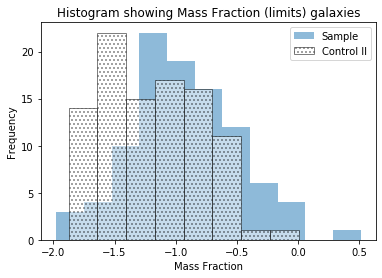

97


In [33]:
plt.xlabel("Mass Fraction")
plt.ylabel("Frequency")
plt.title("Histogram showing Mass Fraction (limits) galaxies")
plt.hist(MF_sample, bins='auto', alpha=0.5, label='Sample')
plt.hist(MF_control, bins='auto', alpha=0.5, label='Control II', hatch='...', fc="white", ec="black")
plt.legend()
plt.show()

print(len(MF_sample))